<a href="https://colab.research.google.com/github/DamianDominoDavis/cpp/blob/master/sommalier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
-# run each cell in order, or they won't communicate with each other!

import random, math
import matplotlib.pyplot as plt
import numpy as np
import pandas

# load master data
url = 'https://raw.githubusercontent.com/DamianDominoDavis/sommalier/master/winequality-red.csv'
csv = pandas.read_csv(url, sep=';')

#V.1 Exploring the green reds
<p>
    <ol type="a">
        <li>Write a function that will plot a scatterplot matrix of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color, and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots. Here’s an example function definition: <pre>def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False)</pre></li>
    </ol>
</p>


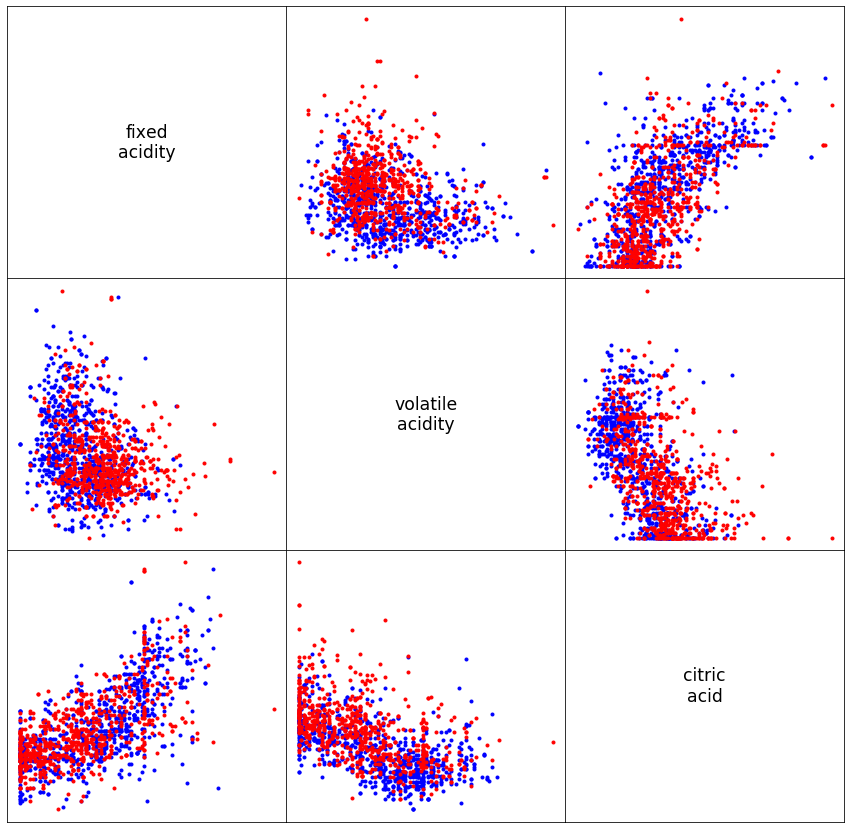

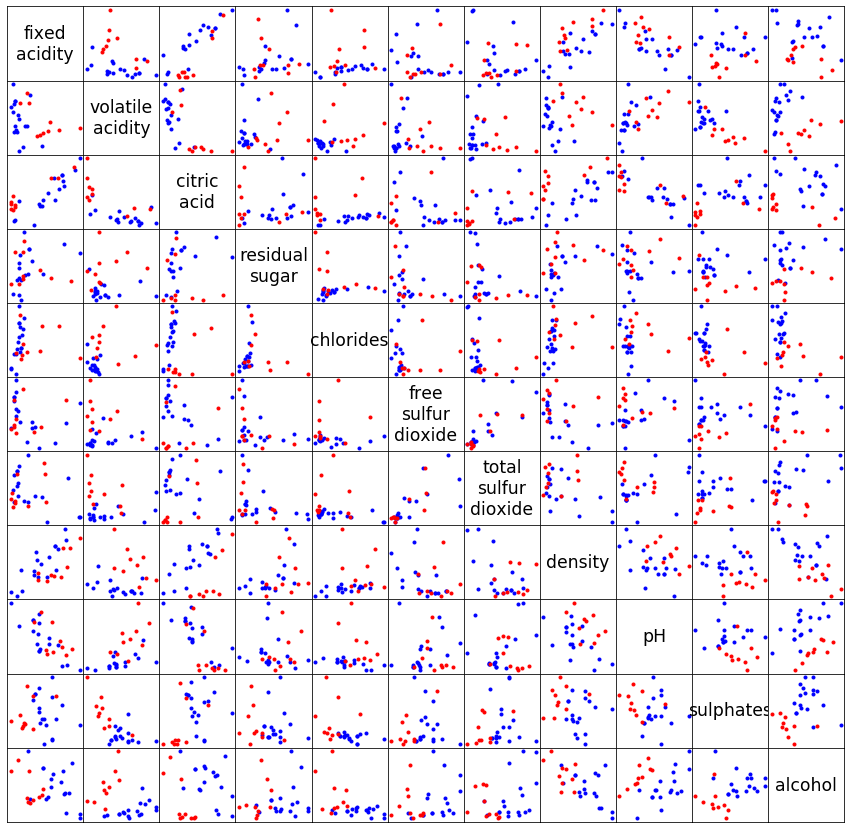

In [0]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save=False):
    wine_good = wine_data[wine_data.quality >= good_threshold]
    wine_bad = wine_data[wine_data.quality <= bad_threshold]
    dimens = tuple([x for x in wine_data if x != 'quality'])
    txt_args = {'size': 'xx-large',
                'horizontalalignment': 'center',
                'verticalalignment': 'center'}
    fig = plt.figure(figsize=[15, 15])
    fig.subplots_adjust(wspace=0, hspace=0)
    ax = fig.subplots(len(dimens), len(dimens))
    for r, rd in enumerate(dimens):
        for c, cd in enumerate(dimens):
            ax[r,c].get_xaxis().set_visible(False)
            ax[r,c].get_yaxis().set_visible(False)
            if r == c:
                ax[r,c].text(0.5, 0.5, rd.replace(' ', '\n'), txt_args)
            else:
                ax[r,c].plot(rd, cd, 'b.', data=wine_good)
                ax[r,c].plot(rd, cd, 'r.', data=wine_bad)
    if save:
        return fig.savefig('wine_plot.png', dpi=100)

small = csv[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']]
plot_scatter_matrix(small, 6, 5, save=True)
plot_scatter_matrix(csv, 8, 3)


<p>
    <ol type="a" start=2>
        <li>Now that you’ve had a chance to analyze different chemical factors in red wines and their relationship with high scores (8 or higher) and low scores (3 or lower), which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

---
Correlation within good and bad groups is less important than clear distinction between the two. Which, if any, of these axes will be separable depends as much on the threshold selections as the input data.</li>
    </ol>
</p>


<h1 color="red">V.2 Learning to perceptron</h1>
<p>
    <ol type="a">
        <li><strong>Implement a perceptron</strong> that:
            <ul><small>
                <li>Has randomly initialized weights and bias</li>
                <li>Uses the Rosenblatt perceptron learning rule (with changeable learning rate)</li>
                <li>Utilizes the heaviside step activation function (discrete version)</li>
            </small></ul>
        </li>
        <li>You’ll need to implement a function to <strong>train your perceptron</strong>. Your training function
should take in your red wine data as a parameter and should:
            <ul><small>
                <li>Have a way to specify number of training epochs</li>
                <li>Train your perceptron until it makes no errors, if training epochs is set to 0,</li>
                <li>Have a way to specify learning rate.</li>
                <li>Return a list of python tuples containing (performance):<br/><pre>[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), &hellip; ]</pre></li>
            </small></ul>
        </li>
        <li>Now that you have a perceptron, a way to train your perceptron, and some data, you need a way to confirm that your perceptron actually works. Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure:
            <ul><small>
                <li>The first plot should <strong>plot the number of errors your perceptron made as a function of epoch</strong>. Be careful with how you calculate errors!</li>
                <li>The second plot should <strong>plot the decision boundary</strong> of your perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch. This second plot should also shade ‘good’ and ‘bad’ areas!</li>
                <li>Your function should allow the user to specify a <strong>specific epoch</strong> and see what the decision boundary of the perceptron was on that epoch. If a negative epoch is given, cause the plots to show the last epoch.</li>
            </small></ul>
        </li>
        <li>Your perceptron appears to work... but why is it taking so many epochs to train? Maybe you can modify the red wine data to help the perceptron learn more quickly? Use the function you just created in part c) to plot and verify that your perceptron is learning more efficiently! <em><br/>(Data standardization.)</em>
        </li>
    </ol>
</p>


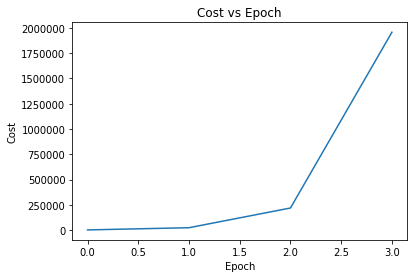

NameError: ignored

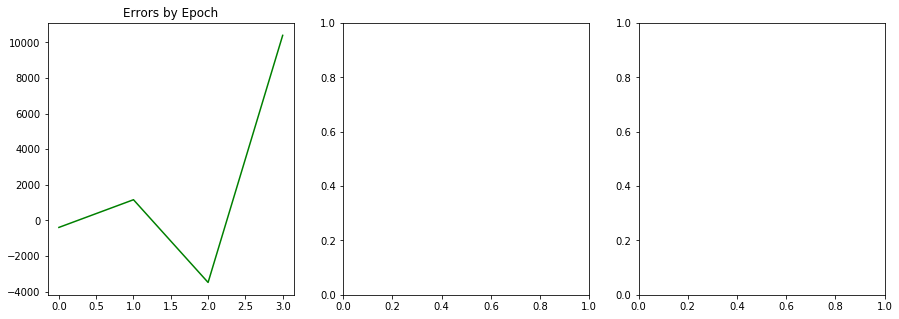

In [0]:
class Perceptron(object):
    def __init__(self, data):
        dimens = [x for x in data if x != 'quality']
        self.data = data
        self.dimens = tuple(dimens)
        self.D = len(self.dimens)

    def train(self, threshold, rate=0.1, epoch=5000):
        ret = list()
        bias, weights = random.uniform(-1,1), [random.uniform(-1,1)] * self.D
        cur_epoch = 0
        while cur_epoch < epoch or epoch == 0:
            num_errors = 0
            for i in range(len(self.data.index)):
                xi = self.data.iloc[i]
                cmp = bias + sum([weights[d] * xi[self.dimens[d]] for d in range(self.D)])
                yi = int(cmp > 0)
                error = int(xi.quality >= threshold) - yi
                if error:
                    num_errors += 1
                    weights = [weights[w] + error * rate * xi[self.dimens[w]] for w in range(self.D)]
                    bias += error * rate
            ret.append(tuple([cur_epoch, num_errors, weights, bias]))
            cur_epoch += 1
            if num_errors == 0:
                break
        return ret

def report(performance, data, good_thresh, bad_thresh,  epoch=-1, save_plot=False):
    print('{} in {} epochs'.format('success' if performance[-1][1] == 0 else 'failed', performance[-1][0]))
    e = performance[epoch if 0 <= epoch and epoch < len(performance) else -1]
    a, b = -(e[3]/e[2][1])/(e[3]/e[2][0]), -(e[3]/e[2][1])
    x = [xmin, xmax] = [np.min(data.pH), np.max(data.pH)]
    c = [ya, yb] = [a*xmin + b, a*xmax + b]
    y = [ymin, ymax] = [np.min(data.alcohol), np.max(data.alcohol)]

    fig = plt.figure(figsize=[15, 5])
    ax, bx = fig.subplots(1, 2)
    story = pandas.DataFrame(performance, columns=['epoch', 'errors', 'weights', 'bias'])
    ax.plot(story.epoch, story.errors, 'g-')
    bx.axis([xmin, xmax, ymin, ymax])
    bx.plot(data[data.quality>=gthresh].pH, data[data.quality>=gthresh].alcohol, 'b.')
    bx.plot(data[data.quality<=bthresh].pH, data[data.quality<=bthresh].alcohol, 'r.')
    bx.plot(x, c, "k--")
    bx.fill_between(x, c, ymin, where= c<=ymax, color="red", alpha=.4)
    bx.fill_between(x, c, ymax, where= c<=ymax, color="blue", alpha=.4)

# select training columns
training = csv[['pH', 'alcohol','quality']]
# exclude training rows
training = training[(training.quality >= gthresh) | (training.quality <= bthresh)]

poor = Perceptron(training)
report(poor.train(gthresh), poor.data, gthresh, bthresh)

# normalize, except for quality
dimens = [x for x in training if x != 'quality']
training[dimens] = (training[dimens]-training[dimens].mean()) / training[dimens].std()

per = Perceptron(training)
report(per.train(gthresh), per.data, gthresh, bthresh)


<h1>V.3 My fair ADALINE</h1>
<p>Encouraged by the results of your perceptron, you decide to see if you can use it to distinguish between wines with a score of 4 and lower, and wines with a score of 7 and higher. Feeling confident, you decide to let the perceptron train until it can find the best decision boundary.
<ol type="a">
    <li>Marvin notices and chides you for torturing your perceptron. Why? You decide to upgrade your perceptron to handle this harder classification task. You’ve heard a bit about the gradient descent technique and also about ADALINE, maybe these will do the trick? Gradient descent, know it, love it!</li>
    <li>Implement an ADALINE that:
        <ul><small>
            <li>Has randomly initialized weights and bias</li>
            <li>Uses a linear activation function and some kind of quantizer</li>
            <li>Uses the Widrow-Hoff learning rule</li>
        </small></ul>
    </li>
    <li>You’ll need to implement a function to train your ADALINE. Your training function should:
        <ul><small>
            <li>Take in your red wine data as a parameter</li>
            <li>Have a way to specify number of training epochs</li>
            <li>If training epochs is set to 0, your ADALINE should train until it converges on a good set of weights.</li>
            <li>Have a way to specify learning rate.</li>
            <li>Have an option to perform either online learning or batch learning</li>
        </small></ul>
    </li>
    <li>Find a good learning rate for your ADALINE and plot number of classification errors vs. epoch and the decision boundary of your ADALINE. What settings tend to give the smallest number of classification errors? Support your reasoning with example plots!</li>
</ol>
</p>


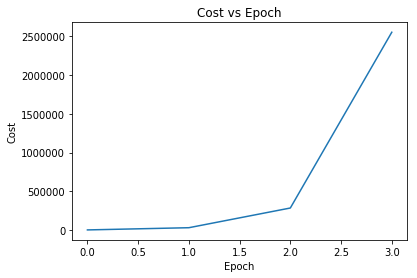

NameError: ignored

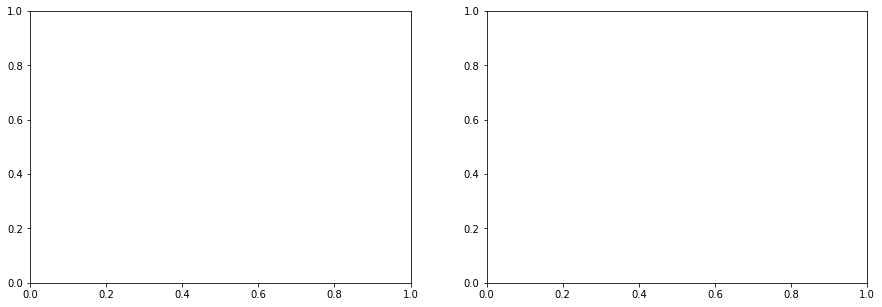

In [0]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def lst_add(X, w):
	return [x+w for x in X]

def lst_plus_lst(lst1, lst2):
	return [a+b for a,b in zip(lst1,lst2)]

def list_minus_list(lst1, lst2):
	return [a-b for a,b in zip(lst1,lst2)]

def lst_mult(lst, no):
	return [x * no for x in lst]

def transpose(lst):
	return [[row[i] for row in lst] for i in range(len(lst[0]))]

def dot(lst1, lst2):
	return [sum(lst1[row][i]*lst2[i] for i in range(len(lst2))) for row in range(len(lst1))]

class Adaline(object):
	def __init__(self, eta=0.01, epoch=100, batch=False):
		self.eta = eta
		self.epoch = epoch
		self.batch = batch
	
	def fit(self, X, y):
		self.w = [random.uniform(-1,1)] * (1 + X.shape[1])
		story = list()
		if self.batch:
			b = list(zip(X, y))
			random.shuffle(b)
			X[:], y[:] = zip(*b)
			X = (X - X.mean()) / X.std()
			X = X[:self.batch]
			y = y[:self.batch]
		e = 0
		while self.epoch == 0 or e < self.epoch:
			output = self.net_input(X)
			expect = h_step_fun(y, 8)
			errors = list_minus_list(expect, output)
			self.w[1:] = lst_plus_lst(self.w[1:], lst_mult(dot(transpose(X), errors), self.eta))
			self.w[0] += self.eta * sum(errors)
			cost = sum(x**2 for x in errors) / 2
			log = (e, sum(errors), self.w[1:], self.w[0], cost)
			story.append(log)
			if (self.epoch == 0 and e > 2 and abs(story[e - 1][4]) < abs(story[e][4])):
				break
			e += 1
		return story
	
	def net_input(self, X):
		return (lst_add(dot_adaline(X, self.w[1:]), self.w[0]))
	
	def predict(self, X):
		return (1 if self.net_input(X) >= 0 else -1)

def dot_adaline(X, w):
	return [x[0]*w[0] + x[1]*w[1] for x in X]

def h_step_fun(x, good):
	return [int(i>=good) for i in x]





def plot_cost(cost, epoch):
	plt.plot(epoch, cost)
	plt.title("Cost vs Epoch")
	plt.xlabel("Epoch")
	plt.ylabel("Cost")
	plt.show()

def plot_performance(story, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
	errors = [e[1] for e in story]
	tup = story[epoch if epoch >= 0 else -1]
	good = wine_data[wine_data['quality'] < good_thresh]
	bad = wine_data[wine_data['quality'] >= good_thresh]
	
	xmin = min(wine_data[wine_data.columns[1]].values)
	xmax = max(wine_data[wine_data.columns[1]].values)
	ymin = min(wine_data[wine_data.columns[0]].values)
	ymax = max(wine_data[wine_data.columns[0]].values)
	m = -(tup[3]/tup[2][0])/(tup[3]/tup[2][1])
	b = -tup[3]/tup[2][0]
	x = [xmin, xmax]
	y = lst_add(lst_mult(x, m), b)

	# fg = plt.figure(figsize=(20, 5))
	# ax1 = fg.add_subplot(121)
	# ax2 = fg.add_subplot(122)
	# ax1.plot(range(0, story[len(story) - 1][0]), errors[1:])
	# ax1.set_title("Errors as a function of epoch")
	# ax1.set_xlabel("epoch")
	# ax1.set_ylabel("classification errors")
	
	# ax2.plot(x, y, label="Decision Boundary")
	# ax2.axis([x_min, x_max, y_min, y_max])
	# ax2.fill_between(x, y, y_min - 2, where=y>y_min - 2, facecolor='blue', alpha=.2)
	# ax2.fill_between(x, y, y_max + 2, where=y<y_max + 2, facecolor='red', alpha=.2)
	# ax2.scatter(good[good.columns[1]], good[good.columns[0]], c='red', label='bad wines(<{0} score)'.format(bad_thresh + 1), s=20)
	# ax2.scatter(bad[bad.columns[1]], bad[bad.columns[0]], c='blue', label='good wines(>{0} score)'.format(good_thresh -1), s=20)
	# ax2.set_title("Decision boundary on epoch: {0}".format(tup[0]))
	# ax2.set_xlabel(wine_data.columns[1])
	# ax2.set_ylabel(wine_data.columns[0])
	# ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

	fig = plt.figure(figsize=[15, 5])
	ax, bx = fig.subplots(1, 2)
	story = pd.DataFrame([(e,s) for e,s in enumerate(self.cost_)], columns=['epoch', 'sse'])
	ax.plot(range(len(story)), errors, 'g-')
	bx.axis([xmin/1.1, xmax*1.1, ymin/1.1, ymax*1.1])
	bx.plot(good.iloc[:,0], good.iloc[:,1], 'b.')
	bx.plot(bad.iloc[:,0], bad.iloc[:,1], 'r.')
	bx.plot(x, y, 'k--')
	bx.fill_between(x, y, ymin, where= y<=ymax, color="red", alpha=.4)
	bx.fill_between(x, y, ymax, where= y<=ymax, color="blue", alpha=.4)


	plt.tight_layout()
	if (save_plot == True):
		plt.savefig('save.png')
	else:
		plt.show()

def before2(eta_tmp=0.0001, iteration=100):
	url = 'https://raw.githubusercontent.com/ssnelgrove314/ft_sommelier/master/winequality-red.csv'
	df = pd.read_csv(url, sep=';')
	df = df[(df.quality >= 8) | (df.quality <= 3)]
	X = df[['pH', 'alcohol']].values
	y = df['quality'].values
	
	# made as class to make it easier to modify, eta: learning rate; epoch: training epochs
	ppn1 = Adaline(eta = eta_tmp, epoch = iteration)
	ret = ppn1.fit(X, y)
	plot_cost([x[4] for x in ret], [x[0] for x in ret])
	plot_performance(ret, df[['pH', 'alcohol', 'quality']], 8, 3, )

	
before2(eta_tmp=0.001, iteration=0)
before2(eta_tmp=0.001, iteration=0, batch=10)
# before2(eta_tmp=0.0001, iteration=0)
# before2(eta_tmp=0.00001, iteration=0)
# before2(eta_tmp=0.000001, iteration=0)


Adaline: learn rate (1), batch size (None), time = 4 epochs


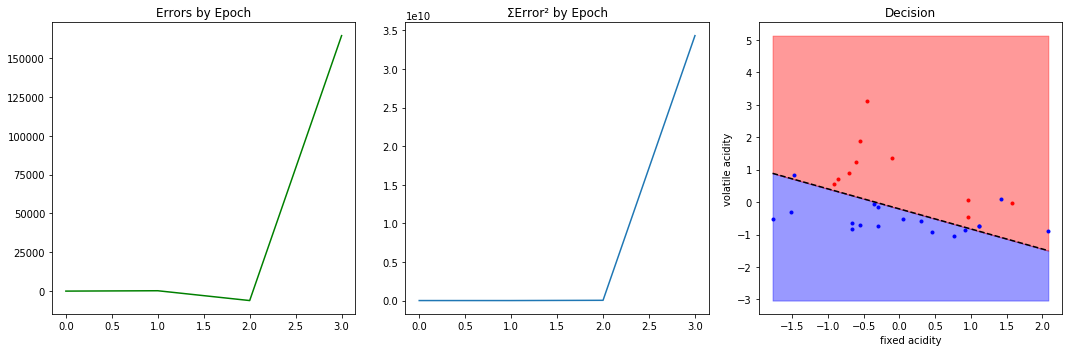

Adaline: learn rate (0.1), batch size (None), time = 4 epochs


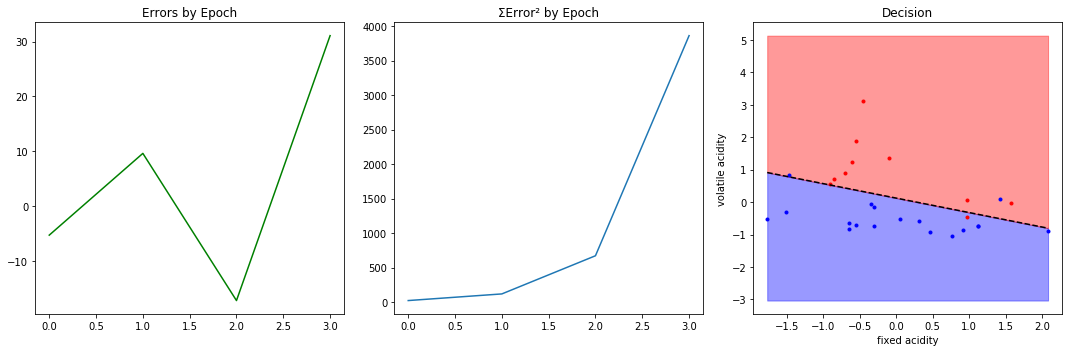

Adaline: learn rate (0.01), batch size (None), time = 90 epochs


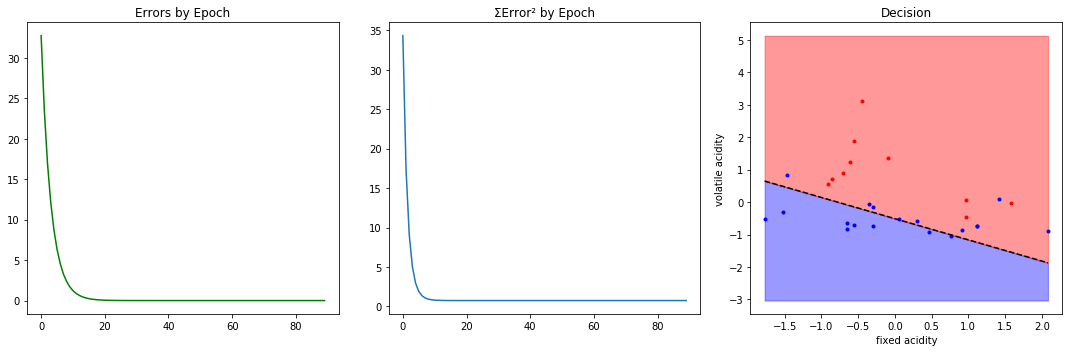

Adaline: learn rate (0.001), batch size (None), time = 843 epochs


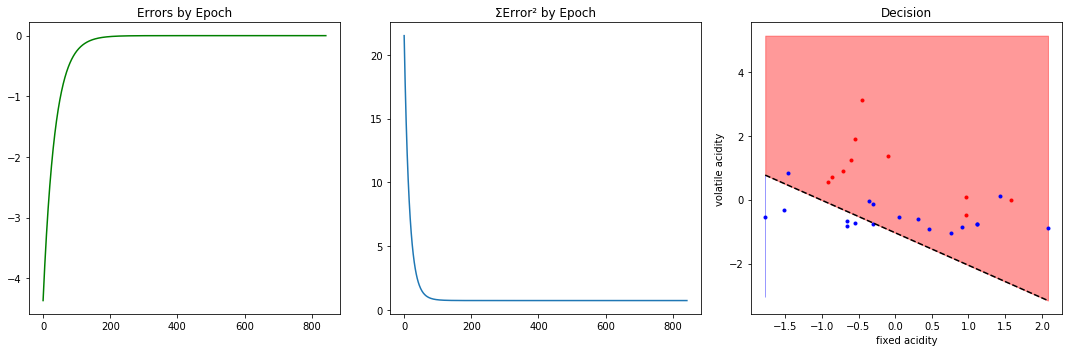

Adaline: learn rate (0.0001), batch size (None), time = 7788 epochs


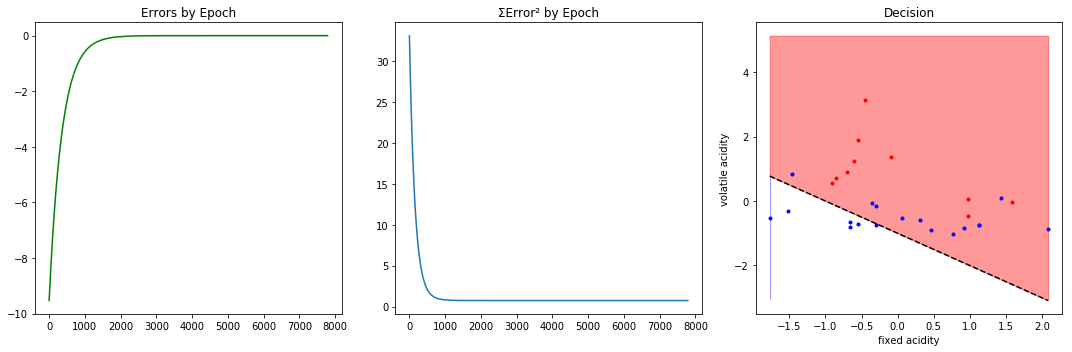

In [96]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def lst_add(X, w):
	return [x+w for x in X]

def lst_plus_lst(lst1, lst2):
	return [a+b for a,b in zip(lst1,lst2)]

def lst_minus_lst(lst1, lst2):
	return [a-b for a,b in zip(lst1,lst2)]

def lst_mult(X, k):
	return [x * k for x in X]

def transpose(lst):
	return [[row[i] for row in lst] for i in range(len(lst[0]))]

def dot(a, b):
	return [sum(a[row][i]*b[i] for i in range(len(b))) for row in range(len(a))]

class Adaline(object):
	def __init__(self, lrate=0.01, epoch=100, batch=None):
		if epoch < 0:
			raise ValueError("Adaline needs nonpositive target epoch or 0 (got {})".format(epoch))
		self.lrate = lrate
		self.epoch = epoch
		self.batch = batch
	
	def fit(self, X, y):
		self.w = [random.uniform(-1,1)] * (1 + X.shape[1])
		story = list()
		if self.batch:
			b = list(zip(X, y))
			random.shuffle(b)
			X[:], y[:] = zip(*b)
			X = X[:self.batch]
			y = y[:self.batch]
		e = 0
		while self.epoch == 0 or e < self.epoch:
			output = self.net_input(X)
			expect = h_step_fun(y, 8)
			errors = lst_minus_lst(expect, output)
			self.w[1:] = lst_plus_lst(self.w[1:], lst_mult(dot(transpose(X), errors), self.lrate))
			self.w[0] += self.lrate * sum(errors)
			cost = sum(x**2 for x in errors) / 2
			log = (e, sum(errors), self.w[1:], self.w[0], cost)
			story.append(log)
			if (self.epoch == 0 and e > 2 and abs(story[e - 1][4]) < abs(story[e][4])):
				break
			e += 1
		return story
	
	def net_input(self, X):
		return (lst_add(dot_adaline(X, self.w[1:]), self.w[0]))
	
	def predict(self, X):
		return (1 if self.net_input(X) >= 0 else -1)

def dot_adaline(X, w):
	return [x[0]*w[0] + x[1]*w[1] for x in X]

def h_step_fun(X, good):
	return [int(x>=good) for x in X]

def plot_performance(story, df, good_thresh, bad_thresh, epoch=-1, save_plot=False):
	errors = [e[1] for e in story]
	cost = [c[4] for c in story]
	tup = story[epoch]
	good = df[df['quality'] >= good_thresh]
	bad = df[df['quality'] < good_thresh]
	
	xmin = min(df[df.columns[0]].values)
	xmax = max(df[df.columns[0]].values)
	ymin = min(df[df.columns[1]].values)
	ymax = max(df[df.columns[1]].values)
	m = -(tup[3]/tup[2][0])/(tup[3]/tup[2][1])
	b = -tup[3]/tup[2][0]
	x = [xmin, xmax]
	y = lst_add(lst_mult(x, m), b)

	# fg = plt.figure(figsize=(20, 5))
	# ax1 = fg.add_subplot(121)
	# ax2 = fg.add_subplot(122)
	# ax1.plot(range(0, story[len(story) - 1][0]), errors[1:])
	# ax1.set_title("Errors as a function of epoch")
	# ax1.set_xlabel("epoch")
	# ax1.set_ylabel("classification errors")
	
	# ax2.plot(x, y, label="Decision Boundary")
	# ax2.axis([x_min, x_max, y_min, y_max])
	# ax2.fill_between(x, y, y_min - 2, where=y>y_min - 2, facecolor='blue', alpha=.2)
	# ax2.fill_between(x, y, y_max + 2, where=y<y_max + 2, facecolor='red', alpha=.2)
	# ax2.scatter(good[good.columns[1]], good[good.columns[0]], c='red', label='bad wines(<{0} score)'.format(bad_thresh + 1), s=20)
	# ax2.scatter(bad[bad.columns[1]], bad[bad.columns[0]], c='blue', label='good wines(>{0} score)'.format(good_thresh -1), s=20)
	# ax2.set_title("Decision boundary on epoch: {0}".format(tup[0]))
	# ax2.set_xlabel(df.columns[1])
	# ax2.set_ylabel(df.columns[0])
	# ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

	fig = plt.figure(figsize=[15, 5])
	ax, bx, cx = fig.subplots(1, 3)
	ax.set_title("Errors by Epoch")
	cx.set_xlabel("Epoch")
	cx.set_ylabel("Error")
	ax.plot(range(len(story)), errors, 'g-')
	bx.set_title(u"\u03A3Error\u00B2 by Epoch")
	cx.set_xlabel("Epoch")
	cx.set_ylabel("Cost")
	bx.plot(range(len(story)), cost)
	cx.set_title("Decision")
	cx.set_xlabel(df.columns[0])
	cx.set_ylabel(df.columns[1])
	cx.plot(good.iloc[:,0], good.iloc[:,1], 'b.')
	cx.plot(bad.iloc[:,0], bad.iloc[:,1], 'r.')
	cx.plot(x, y, 'k--')
	# cx.fill_between(x, y, ymin, where= y<=ymax, color="red", alpha=.4)
	# cx.fill_between(x, y, ymax, where= y<=ymax, color="blue", alpha=.4)
	cx.fill_between(x, y, ymin - 2, where=y>ymin - 2, color="blue", alpha=.4)
	cx.fill_between(x, y, ymax + 2, where=y<ymax + 2, color="red", alpha=.4)

	plt.tight_layout()
	if (save_plot == True):
		plt.savefig('save.png')
	else:
		plt.show()

def data():
	url = 'https://raw.githubusercontent.com/DamianDominoDavis/sommalier/master/winequality-red.csv'
	df = pd.read_csv(url, sep=';')
	df = df[(df.quality >= 8) | (df.quality <= 3)]
	dimens = [d for d in df if d != 'quality']
	df[dimens] = (df[dimens] - df[dimens].mean()) / df[dimens].std()
	X = df[['pH', 'alcohol']].values
	y = df['quality'].values
	return X, y, df

def demo(lrate, ep=0, batch=None):
	X, y, df = data()
	if not batch or batch <= X.shape[0]:
		ada = Adaline(lrate, ep, batch)
		story = ada.fit(X, y)
		print("Adaline: learn rate ({}), batch size ({}), time = {} epochs".format(lrate, batch, len(story)))
		plot_performance(story, df, 8, 3, ep)

lrate = 1
while lrate > 1e-5:
	# for bsize in [None, 10, 25]:
	demo(lrate, 0)
	lrate /= 10
